<a href="https://colab.research.google.com/github/ModelacionGrupo1/Proyecto-de-Modelacion/blob/main/Ajustes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sympy as sp
from scipy.optimize import curve_fit


In [ ]:
#Para leer datos desde Google Drive: 
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_ppa=pd.read_excel('/content/drive/MyDrive/BD_Nuevo/Total_poblacion.xlsx')
df_ppa['Region'][4]='La Montaña'
df_ppa.index=df_ppa['Region']
df_ppa=df_ppa.drop(['Region'],axis=1)
df_ppa

<ipython-input-32-565cb59c806c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ppa['Region'][4]='La Montaña'


,Poblacion_1950,Poblacion_1960,Poblacion_1970,Poblacion_1980,Poblacion_1990,Poblacion_1995,Poblacion_2000,Poblacion_2005,Poblacion_2010,Poblacion_2020
Region,,,,,,,,,,
Acapulco,55862,84720,238713,409335,593212,687292,722499,717766,789971,779566
Centro,158430,197918,256296,340770,227473,254109,523845,570824,636464,700593
Costa Chica,131297,173054,214662,277463,318506,598072,388416,394455,428501,461500
Costa Grande,110076,152630,205431,248595,175784,155069,391423,387423,413793,423756
La Montaña,111161,144323,170736,214716,328774,504862,320114,342419,386644,431253
Norte,223490,272610,333444,394791,601057,518957,464022,454907,482383,499462
Tierra Caliente,129070,161461,178078,223843,375831,198206,269330,247408,251012,244555


In [ ]:
ejx=df_ppa.columns.values
ejex = np.char.replace(ejx.astype('str'), 'Poblacion_', '')

In [ ]:
tc=pd.DataFrame()
for x in np.arange(0,9): 
  n=ejex[x+1].astype('float')-ejex[x].astype('float')
  tc[ejex[x+1]+'-'+ejex[x]]=(np.power(df_ppa.iloc[:,x+1]/df_ppa.iloc[:,x],(1/n))-1)*100

tc

,1960-1950,1970-1960,1980-1970,1990-1980,1995-1990,2000-1995,2005-2000,2010-2005,2020-2010
Region,,,,,,,,,
Acapulco,4.252612,10.914675,5.540775,3.779866,2.987916,1.004144,-0.131362,1.935546,-0.132501
Centro,2.250346,2.618498,2.889712,-3.961172,2.239340,15.567722,1.732539,2.200807,0.964615
Costa Chica,2.799898,2.177989,2.599440,1.389097,13.429801,-8.270563,0.309039,1.669544,0.744649
Costa Grande,3.322457,3.015508,1.925451,-3.406324,-2.476534,20.343952,-0.205223,1.325685,0.238203
La Montaña,2.645121,1.694849,2.318445,4.352608,8.956977,-8.709329,1.356274,2.459135,1.097889
Norte,2.006623,2.034752,1.703157,4.292923,-2.894653,-2.212929,-0.395993,1.179814,0.348537
Tierra Caliente,2.264343,0.984394,2.313590,5.318559,-12.011718,6.324558,-1.683638,0.289658,-0.260266


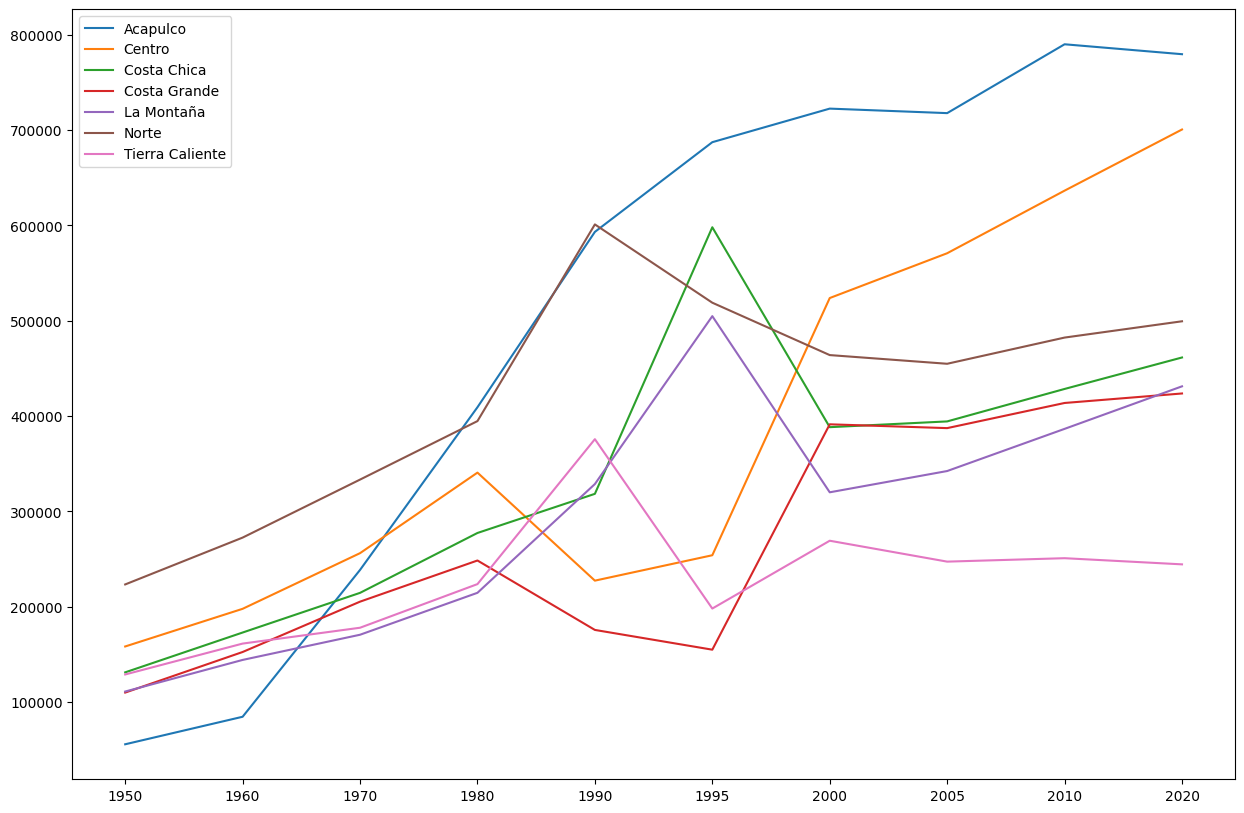

In [ ]:

fig,ax=plt.subplots(figsize=(15,10))
for x in np.arange(0,7): 
  ax.plot(ejex,df_ppa.iloc[x].values,label=df_ppa.index.to_list()[x])
  plt.legend()

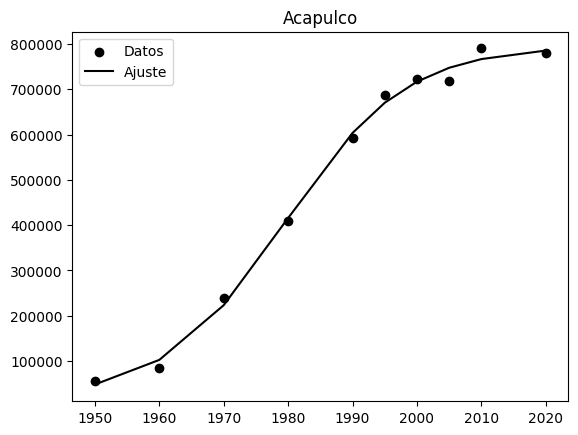

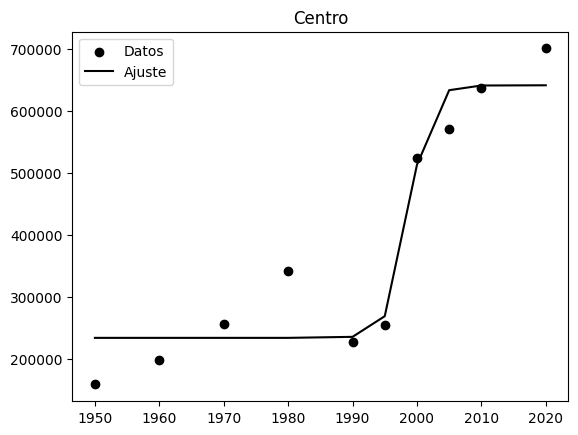

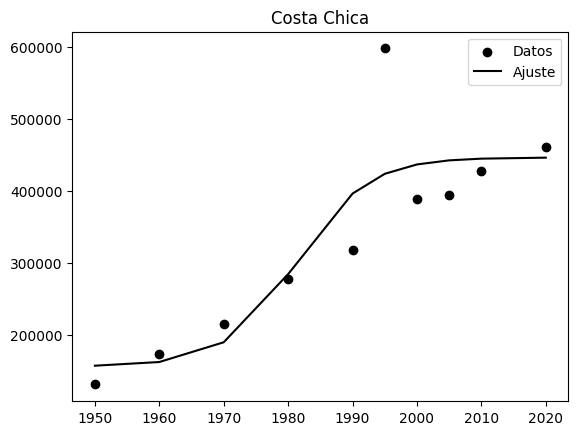

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


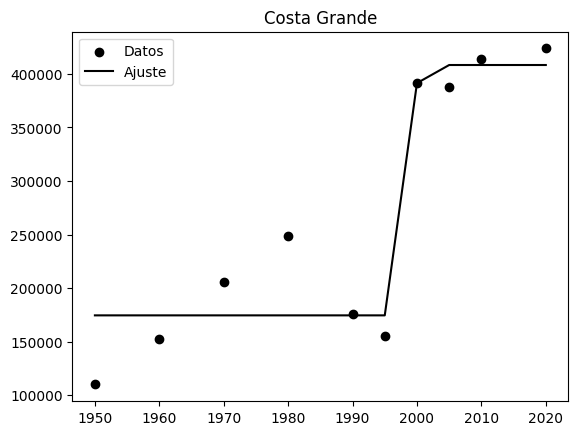

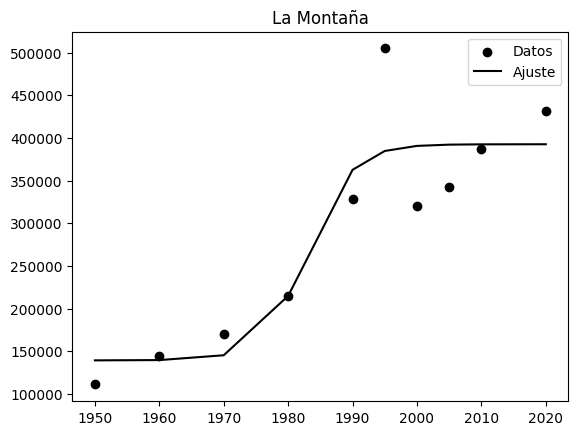

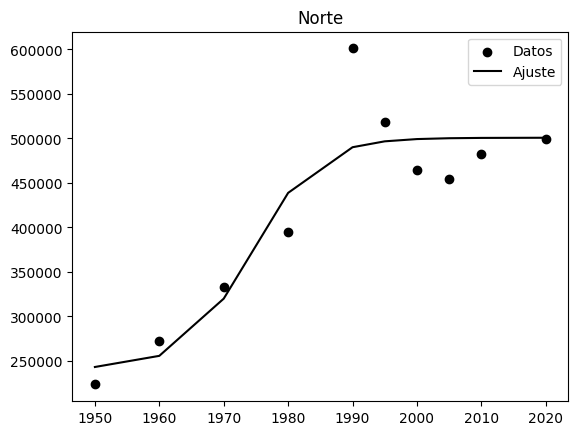

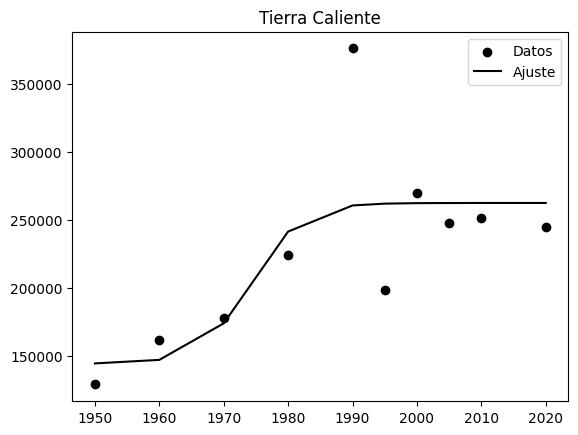

In [ ]:

ejex.astype('float')
a1=np.ones(7)
a2=np.ones(7)
xm0=np.ones(7)
dmx=np.ones(7)
R2=np.ones(7)
def sigmoid(x, A1, A2, x0, dx):
        return (A1 - A2) / (1 + np.exp((x - x0)/dx)) + A2


for w in np.arange(0,7):
  x_data = ejex.astype('float')
  y_data = df_ppa.iloc[w]

  # Ajuste de la curva
  popt, pcov = curve_fit(sigmoid, x_data, y_data,[np.max(y_data),np.min(y_data), np.median(x_data)  ,(np.max(x_data) - np.min(x_data)) / 2 ])
  A1, A2, x0, dx = popt
  a1[w],a2[w],xm0[w],dmx[w]= A1,A2,x0,dx
  y_mean = np.mean(y_data)
  y_pred = sigmoid(x_data, A1, A2, x0, dx)
  SST = np.sum((y_data - y_mean)**2)
  SSE = np.sum((y_data - y_pred)**2)
  R2[w] = 1 - SSE/SST
  fig,ax=plt.subplots()
  ax.set_title(df_ppa.index.tolist()[w])
  ax.scatter(x_data, y_data, label='Datos',color='black')
  ax.plot(x_data, sigmoid(x_data, A1, A2, x0, dx), label='Ajuste',color='black')
  plt.legend()
  plt.show()
  y_mean = np.mean(y_data)
  y_pred = sigmoid(x_data, A1, A2, x0, dx)
  SST = np.sum((y_data - y_mean)**2)
  SSE = np.sum((y_data - y_pred)**2)
  R2[w] = 1 - SSE/SST

In [ ]:
TR=pd.DataFrame({'A1':a1,'A2':a2,'x0':xm0,'dx':dmx,'R2':R2},index=df_ppa.index)
TR

,A1,A2,x0,dx,R2
Region,,,,,
Acapulco,16045.410836,795610.457667,1979.527216,9.368979,0.996603
Centro,233648.382231,641198.085106,1998.763153,1.590465,0.926362
Costa Chica,156356.911082,446664.565424,1981.299831,5.554656,0.768590
Costa Grande,174597.500000,408324.000000,1999.718186,0.110441,0.912385
La Montaña,139395.996592,392645.176775,1982.987923,3.492270,0.830399
Norte,241037.840221,500768.684735,1974.168008,5.025214,0.845213
Tierra Caliente,144337.485268,262373.040497,1974.163664,3.810434,0.555364


# Nuevos ajustes


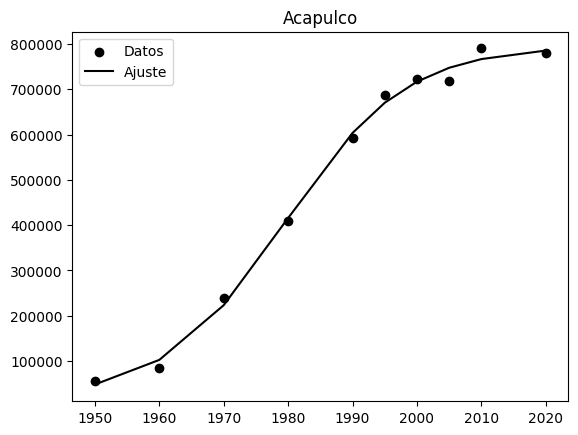

La población proyectada para el año 2030 es: 792060.4546093463
La población proyectada para el año 2040 es: 794385.8892577131
La población proyectada para el año 2050 es: 795188.872120666


In [ ]:
####Prediccion de los siguientes años Acapulco####


x_data = np.array([1950, 1960, 1970, 1980, 1990, 1995, 2000, 2005 ,2010 ,2020])  # Años
y_data = np.array([55862,84720 ,238713 ,409335 ,593212 ,687292 ,722499 ,717766 ,789971 ,779566])  # Poblaciones correspondientes a los años

# Ajustar la curva sigmoid
popt, pcov = curve_fit(sigmoid, x_data, y_data,[np.max(y_data),np.min(y_data), np.median(x_data)  ,(np.max(x_data) - np.min(x_data)) / 2 ])

# Extraer los parámetros ajustados
A1, A2, x0, dx = popt

y_pred_2030 = sigmoid(2030, A1, A2, x0, dx)
y_pred_2040 = sigmoid(2040, A1, A2, x0, dx)
y_pred_2050 = sigmoid(2050, A1, A2, x0, dx)


fig,ax=plt.subplots()
ax.set_title('Acapulco')
ax.scatter(x_data, y_data, label='Datos',color='black')
ax.plot(x_data, sigmoid(x_data, A1, A2, x0, dx), label='Ajuste',color='black')
plt.legend()
plt.show()

print("La población proyectada para el año 2030 es:", y_pred_2030)
print("La población proyectada para el año 2040 es:", y_pred_2040)
print("La población proyectada para el año 2050 es:", y_pred_2050)

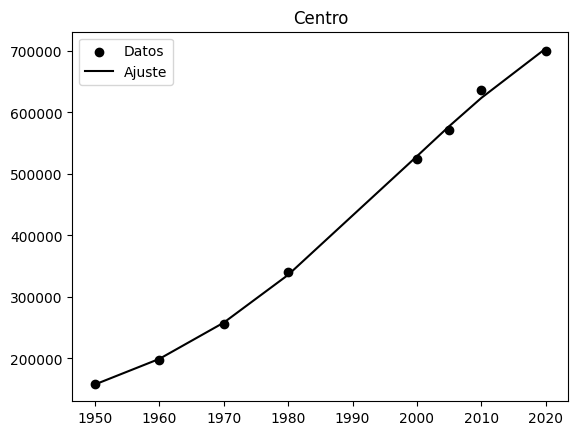

La población proyectada para el año 2030 es: 765757.1303989451
La población proyectada para el año 2040 es: 809720.4003395156
La población proyectada para el año 2050 es: 839362.521618634


In [ ]:
####Prediccion de los siguientes años Centro #### SIN 1990 y 1995


x_data = np.array([1950, 1960, 1970, 1980, 2000, 2005 ,2010 ,2020])  # Años
y_data = np.array([158430	,197918,	256296	,340770		,523845,	570824	,636464	,700593 ])  # Poblaciones correspondientes a los años

# Ajustar la curva sigmoid
popt, pcov = curve_fit(sigmoid, x_data, y_data,[np.max(y_data),np.min(y_data), np.median(x_data)  ,(np.max(x_data) - np.min(x_data)) / 2 ])

# Extraer los parámetros ajustados
A1, A2, x0, dx = popt

y_pred_2030 = sigmoid(2030, A1, A2, x0, dx)
y_pred_2040 = sigmoid(2040, A1, A2, x0, dx)
y_pred_2050 = sigmoid(2050, A1, A2, x0, dx)

fig,ax=plt.subplots()
ax.set_title('Centro')
ax.scatter(x_data, y_data, label='Datos',color='black')
ax.plot(x_data, sigmoid(x_data, A1, A2, x0, dx), label='Ajuste',color='black')
plt.legend()
plt.show()

print("La población proyectada para el año 2030 es:", y_pred_2030)
print("La población proyectada para el año 2040 es:", y_pred_2040)
print("La población proyectada para el año 2050 es:", y_pred_2050)

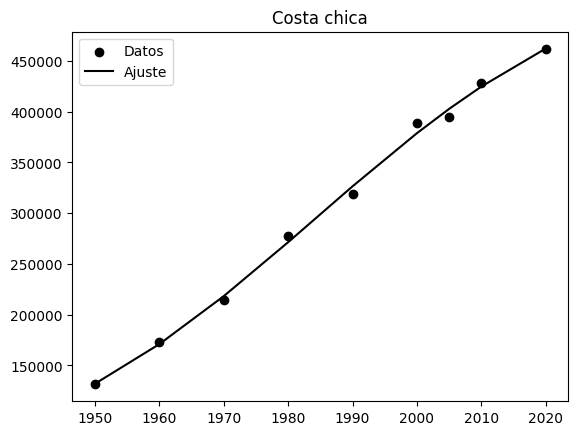

La población proyectada para el año 2030 es: 491126.34149305365
La población proyectada para el año 2040 es: 512360.15183515043
La población proyectada para el año 2050 es: 527462.678783185


In [ ]:
####Prediccion de los siguientes años Costa C#### SIN 1995


x_data = np.array([1950, 1960, 1970, 1980, 1990, 2000, 2005 ,2010 ,2020])  # Años
y_data = np.array([131297, 173054, 214662, 277463, 318506, 388416, 394455, 428501, 461500  ])  # Poblaciones correspondientes a los años

# Ajustar la curva sigmoid
popt, pcov = curve_fit(sigmoid, x_data, y_data,[np.max(y_data),np.min(y_data), np.median(x_data)  ,(np.max(x_data) - np.min(x_data)) / 2 ])

# Extraer los parámetros ajustados
A1, A2, x0, dx = popt

y_pred_2030 = sigmoid(2030, A1, A2, x0, dx)
y_pred_2040 = sigmoid(2040, A1, A2, x0, dx)
y_pred_2050 = sigmoid(2050, A1, A2, x0, dx)

fig,ax=plt.subplots()
ax.set_title('Costa chica')
ax.scatter(x_data, y_data, label='Datos',color='black')
ax.plot(x_data, sigmoid(x_data, A1, A2, x0, dx), label='Ajuste',color='black')
plt.legend()
plt.show()

print("La población proyectada para el año 2030 es:", y_pred_2030)
print("La población proyectada para el año 2040 es:", y_pred_2040)
print("La población proyectada para el año 2050 es:", y_pred_2050)

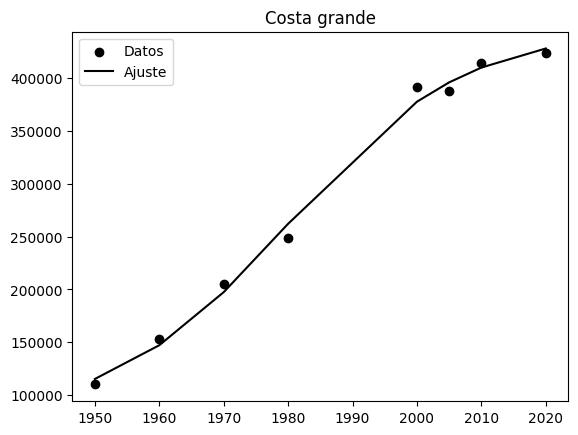

La población proyectada para el año 2030 es: 437214.71707737434
La población proyectada para el año 2040 es: 441855.9720664517
La población proyectada para el año 2050 es: 444117.2335613434


In [ ]:
####Prediccion de los siguientes años Costa Grande#### sin 1995 1990


x_data = np.array([1950, 1960, 1970, 1980, 2000, 2005 ,2010 ,2020])  # Años
y_data = np.array([110076,	152630,	205431	,248595	,	391423	,387423,	413793,	423756])  # Poblaciones correspondientes a los años

# Ajustar la curva sigmoid
popt, pcov = curve_fit(sigmoid, x_data, y_data,[np.max(y_data),np.min(y_data), np.median(x_data)  ,(np.max(x_data) - np.min(x_data)) / 2 ])

# Extraer los parámetros ajustados
A1, A2, x0, dx = popt

y_pred_2030 = sigmoid(2030, A1, A2, x0, dx)
y_pred_2040 = sigmoid(2040, A1, A2, x0, dx)
y_pred_2050 = sigmoid(2050, A1, A2, x0, dx)


fig,ax=plt.subplots()
ax.set_title('Costa grande')
ax.scatter(x_data, y_data, label='Datos',color='black')
ax.plot(x_data, sigmoid(x_data, A1, A2, x0, dx), label='Ajuste',color='black')
plt.legend()
plt.show()

print("La población proyectada para el año 2030 es:", y_pred_2030)
print("La población proyectada para el año 2040 es:", y_pred_2040)
print("La población proyectada para el año 2050 es:", y_pred_2050)

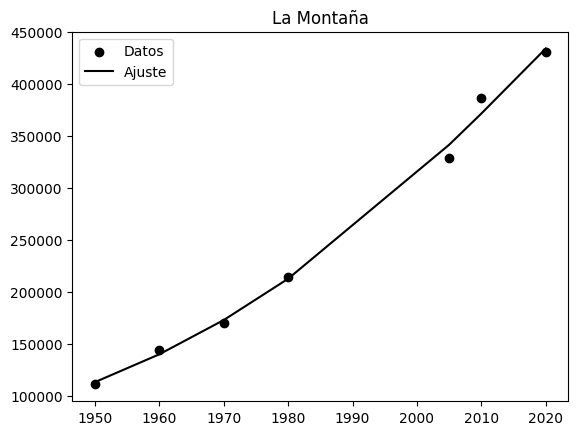

La población proyectada para el año 2030 es: 498331.8554288678
La población proyectada para el año 2040 es: 561082.740164305
La población proyectada para el año 2050 es: 620271.0799228635


In [ ]:
####Prediccion de los siguientes años La Montaña#### sin 1995,2000,2005


x_data = np.array([1950, 1960, 1970, 1980, 2005 ,2010 ,2020])  # Años
y_data = np.array([111161	,144323,	170736	,214716	,328774		,386644	,431253])  # Poblaciones correspondientes a los años

# Ajustar la curva sigmoid
popt, pcov = curve_fit(sigmoid, x_data, y_data,[np.max(y_data),np.min(y_data), np.median(x_data)  ,(np.max(x_data) - np.min(x_data)) / 2 ])

# Extraer los parámetros ajustados
A1, A2, x0, dx = popt

y_pred_2030 = sigmoid(2030, A1, A2, x0, dx)
y_pred_2040 = sigmoid(2040, A1, A2, x0, dx)
y_pred_2050 = sigmoid(2050, A1, A2, x0, dx)


fig,ax=plt.subplots()
ax.set_title('La Montaña')
ax.scatter(x_data, y_data, label='Datos',color='black')
ax.plot(x_data, sigmoid(x_data, A1, A2, x0, dx), label='Ajuste',color='black')
plt.legend()
plt.show()

print("La población proyectada para el año 2030 es:", y_pred_2030)
print("La población proyectada para el año 2040 es:", y_pred_2040)
print("La población proyectada para el año 2050 es:", y_pred_2050)

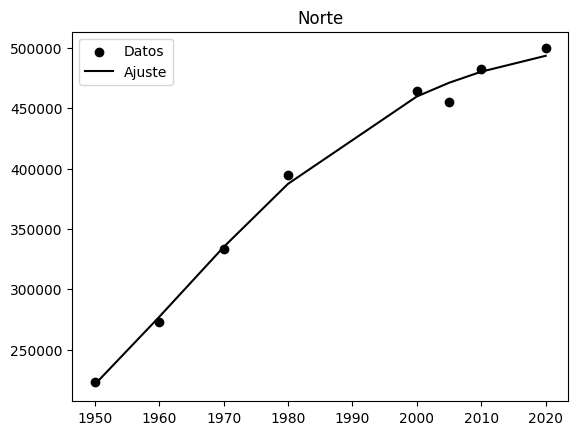

La población proyectada para el año 2030 es: 501591.3931344029
La población proyectada para el año 2040 es: 506577.44554629433
La población proyectada para el año 2050 es: 509577.6367230403


In [ ]:
####Prediccion de los siguientes años Norte#### sin 1990,1995


x_data = np.array([1950, 1960, 1970, 1980, 2000, 2005 ,2010 ,2020])  # Años
y_data = np.array([223490,	272610,	333444	,394791	,464022	,454907	,482383	,499462])  # Poblaciones correspondientes a los años

# Ajustar la curva sigmoid
popt, pcov = curve_fit(sigmoid, x_data, y_data,[np.max(y_data),np.min(y_data), np.median(x_data)  ,(np.max(x_data) - np.min(x_data)) / 2 ])

# Extraer los parámetros ajustados
A1, A2, x0, dx = popt

y_pred_2030 = sigmoid(2030, A1, A2, x0, dx)
y_pred_2040 = sigmoid(2040, A1, A2, x0, dx)
y_pred_2050 = sigmoid(2050, A1, A2, x0, dx)


fig,ax=plt.subplots()
ax.set_title('Norte')
ax.scatter(x_data, y_data, label='Datos',color='black')
ax.plot(x_data, sigmoid(x_data, A1, A2, x0, dx), label='Ajuste',color='black')
plt.legend()
plt.show()

print("La población proyectada para el año 2030 es:", y_pred_2030)
print("La población proyectada para el año 2040 es:", y_pred_2040)
print("La población proyectada para el año 2050 es:", y_pred_2050)

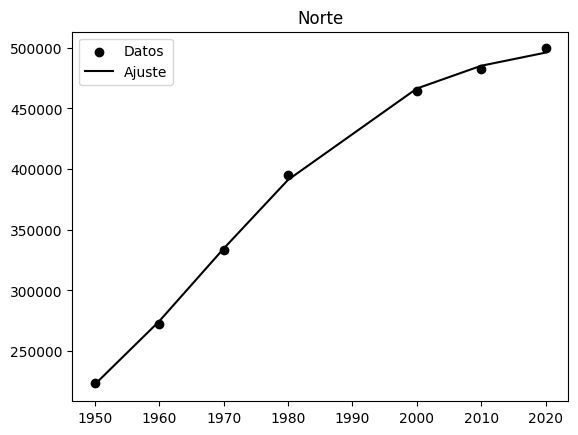

La población proyectada para el año 2030 es: 502079.5955566286
La población proyectada para el año 2040 es: 505351.8943166791
La población proyectada para el año 2050 es: 507111.37890119915


In [ ]:
####Prediccion de los siguientes años Norte#### sin 1990,1995,2005


x_data = np.array([1950, 1960, 1970, 1980, 2000 ,2010 ,2020])  # Años
y_data = np.array([223490,	272610,	333444	,394791	,464022		,482383	,499462])  # Poblaciones correspondientes a los años

# Ajustar la curva sigmoid
popt, pcov = curve_fit(sigmoid, x_data, y_data,[np.max(y_data),np.min(y_data), np.median(x_data)  ,(np.max(x_data) - np.min(x_data)) / 2 ])

# Extraer los parámetros ajustados
A1, A2, x0, dx = popt

y_pred_2030 = sigmoid(2030, A1, A2, x0, dx)
y_pred_2040 = sigmoid(2040, A1, A2, x0, dx)
y_pred_2050 = sigmoid(2050, A1, A2, x0, dx)


fig,ax=plt.subplots()
ax.set_title('Norte')
ax.scatter(x_data, y_data, label='Datos',color='black')
ax.plot(x_data, sigmoid(x_data, A1, A2, x0, dx), label='Ajuste',color='black')
plt.legend()
plt.show()

print("La población proyectada para el año 2030 es:", y_pred_2030)
print("La población proyectada para el año 2040 es:", y_pred_2040)
print("La población proyectada para el año 2050 es:", y_pred_2050)

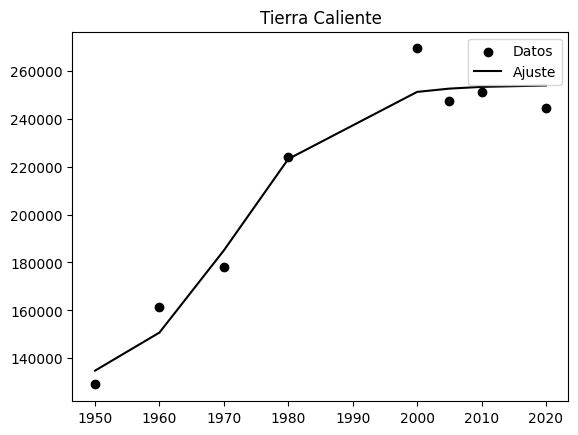

La población proyectada para el año 2030 es: 254026.36288120452
La población proyectada para el año 2040 es: 254068.0515112529
La población proyectada para el año 2050 es: 254079.24874799032


In [ ]:
####Prediccion de los siguientes años Tierra Caliente#### sin 1990,1995


x_data = np.array([1950, 1960, 1970, 1980, 2000, 2005 ,2010 ,2020])  # Años
y_data = np.array([129070	,161461	,178078,	223843	,	269330	,247408	,251012,	244555])  # Poblaciones correspondientes a los años

# Ajustar la curva sigmoid
popt, pcov = curve_fit(sigmoid, x_data, y_data,[np.max(y_data),np.min(y_data), np.median(x_data)  ,(np.max(x_data) - np.min(x_data)) / 2 ])

# Extraer los parámetros ajustados
A1, A2, x0, dx = popt

y_pred_2030 = sigmoid(2030, A1, A2, x0, dx)
y_pred_2040 = sigmoid(2040, A1, A2, x0, dx)
y_pred_2050 = sigmoid(2050, A1, A2, x0, dx)


fig,ax=plt.subplots()
ax.set_title('Tierra Caliente')
ax.scatter(x_data, y_data, label='Datos',color='black')
ax.plot(x_data, sigmoid(x_data, A1, A2, x0, dx), label='Ajuste',color='black')
plt.legend()
plt.show()

print("La población proyectada para el año 2030 es:", y_pred_2030)
print("La población proyectada para el año 2040 es:", y_pred_2040)
print("La población proyectada para el año 2050 es:", y_pred_2050)

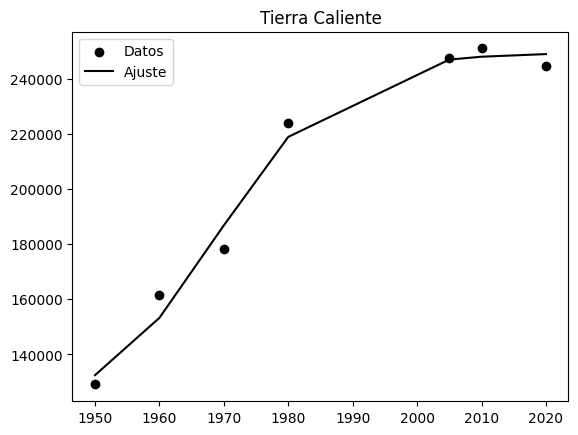

La población proyectada para el año 2030 es: 249297.69261794194
La población proyectada para el año 2040 es: 249404.4966907933
La población proyectada para el año 2050 es: 249439.97481726098


In [ ]:
####Prediccion de los siguientes años Tierra Caliente#### sin 1990,1995,2000


x_data = np.array([1950, 1960, 1970, 1980,  2005 ,2010 ,2020])  # Años
y_data = np.array([129070	,161461	,178078,	223843		,247408	,251012,	244555])  # Poblaciones correspondientes a los años

# Ajustar la curva sigmoid
popt, pcov = curve_fit(sigmoid, x_data, y_data,[np.max(y_data),np.min(y_data), np.median(x_data)  ,(np.max(x_data) - np.min(x_data)) / 2 ])

# Extraer los parámetros ajustados
A1, A2, x0, dx = popt

y_pred_2030 = sigmoid(2030, A1, A2, x0, dx)
y_pred_2040 = sigmoid(2040, A1, A2, x0, dx)
y_pred_2050 = sigmoid(2050, A1, A2, x0, dx)


fig,ax=plt.subplots()
ax.set_title('Tierra Caliente')
ax.scatter(x_data, y_data, label='Datos',color='black')
ax.plot(x_data, sigmoid(x_data, A1, A2, x0, dx), label='Ajuste',color='black')
plt.legend()
plt.show()

print("La población proyectada para el año 2030 es:", y_pred_2030)
print("La población proyectada para el año 2040 es:", y_pred_2040)
print("La población proyectada para el año 2050 es:", y_pred_2050)

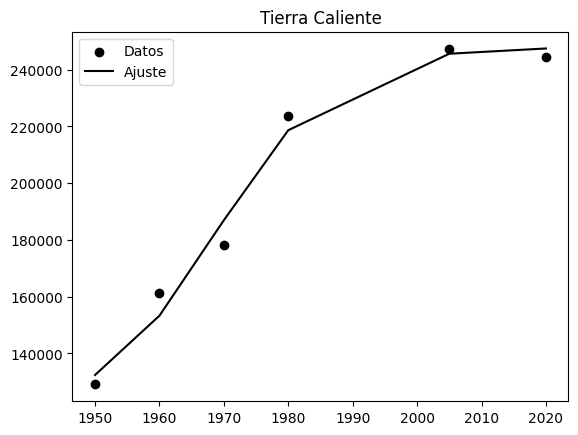

La población proyectada para el año 2030 es: 247759.80358224336
La población proyectada para el año 2040 es: 247855.65647906146
La población proyectada para el año 2050 es: 247887.10268490404


In [ ]:
####Prediccion de los siguientes años Tierra Caliente#### sin 1990,1995,2000


x_data = np.array([1950, 1960, 1970, 1980,  2005 ,2020])  # Años
y_data = np.array([129070	,161461	,178078,	223843		,247408	,	244555])  # Poblaciones correspondientes a los años

# Ajustar la curva sigmoid
popt, pcov = curve_fit(sigmoid, x_data, y_data,[np.max(y_data),np.min(y_data), np.median(x_data)  ,(np.max(x_data) - np.min(x_data)) / 2 ])

# Extraer los parámetros ajustados
A1, A2, x0, dx = popt

y_pred_2030 = sigmoid(2030, A1, A2, x0, dx)
y_pred_2040 = sigmoid(2040, A1, A2, x0, dx)
y_pred_2050 = sigmoid(2050, A1, A2, x0, dx)


fig,ax=plt.subplots()
ax.set_title('Tierra Caliente')
ax.scatter(x_data, y_data, label='Datos',color='black')
ax.plot(x_data, sigmoid(x_data, A1, A2, x0, dx), label='Ajuste',color='black')
plt.legend()
plt.show()

print("La población proyectada para el año 2030 es:", y_pred_2030)
print("La población proyectada para el año 2040 es:", y_pred_2040)
print("La población proyectada para el año 2050 es:", y_pred_2050)